# Assignment 5 - Group 1

## Kaggle Submission ID:

## Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import datetime

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Import & explore data

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
data['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
# Split training data & extract labels

train_set, test_set = train_test_split(data, test_size=0.2, random_state = 42)
y_train = train_set['label']
X_train = train_set.drop('label', axis=1)
y_test = test_set['label']
X_test = test_set.drop('label', axis=1)

In [9]:
#Shape of the data
X_train.shape

(33600, 784)

In [10]:
X_test.shape

(8400, 784)

## 1. Fitting a Random Forest Classifier

In [11]:
rnd_clf = RandomForestClassifier()
start = datetime.datetime.now()
rnd_clf.fit(X_train,y_train)
end = datetime.datetime.now()
print(f'Random classifier took {end - start} seconds to run on raw data')

Random classifier took 0:00:20.024234 seconds to run on raw data


In [16]:
y_pred = rnd_clf.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.9641666666666666

# Kaggle Score is:

## 2. Perform PCA on the combined training and test set data together

In [22]:
# Combine the data set
full_data = X_test.append(X_train).append(test_data)

In [23]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 5457 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 419.2 MB


In [24]:
# Generating principal components that represent 95 percent of the variability in the explanatory variables
start = datetime.datetime.now()
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(full_data)
end = datetime.datetime.now()
print(f'It took {end - start} seconds to identify the PCA')

It took 0:00:04.094919 seconds to identify the PCA


In [25]:
X_reduced

array([[-436.4309755 , -259.5779328 ,  198.38827636, ...,   49.36565913,
         -12.56603673,   57.27269646],
       [-942.43851218, -400.01792167,   10.34166076, ...,  -49.61726703,
          74.44900231,    8.75278918],
       [-525.66257263,  617.26294383,  -86.15405218, ...,  -32.35437731,
         -21.66636008,  -34.7747831 ],
       ...,
       [-138.40587705, -644.81877827, -880.68880607, ...,   38.03280932,
           7.46148739,   33.7243298 ],
       [ -49.43276834,  578.10899532, -323.9904944 , ...,    1.21587393,
          37.84560288,   12.56067207],
       [ 597.31312568,  141.72661007,  818.14854751, ...,   77.30176102,
          48.1828624 ,   69.49837151]])

In [26]:
print('The Principal components count is: ', pca.n_components_)

The Principal components count is:  154


In [27]:
X_reduced.shape

(70000, 154)

In [28]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

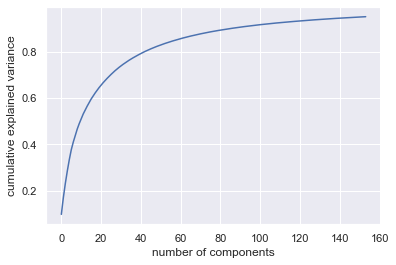

In [29]:
#Explained variance plot

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 3. Using the identified PC from above, use the train.csv to build another random forest classifier.

In [30]:
X_reduced_train = X_reduced[0:33600, :]
X_reduced_test = X_reduced[33600:42000, :]

In [31]:
# Convert to integers
X_reduced_train = X_reduced_train.astype(int)
X_reduced_test = X_reduced_test.astype(int)

In [32]:
## Here we have used train.csv data to build another random forest classifier and record the time along with accuracy.

start = datetime.datetime.now()
rnd_clf2 = RandomForestClassifier(n_estimators = 154, random_state = 42)
rnd_clf2.fit(X_reduced_train, y_train)
end = datetime.datetime.now()
print(f'Random classifier took {end - start} seconds to run on Test data using PCA')

Random classifier took 0:01:14.393347 seconds to run on Test data using PCA


In [34]:
y_pred2 = rnd_clf2.predict(X_reduced_test)

In [35]:
print('Accuracy: ', accuracy_score(y_test,y_pred2))

Accuracy:  0.1075


In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
print('F1 accuracy: ', f1_score(y_pred2, y_test, average='macro'))

F1 accuracy:  0.10282705843258588


## 4. Submit both RF & PCA RF to Kaggle

## 5. Identify design flaw  re-run experiment

## 6.  k-means clustering to group MNIST observations into 1 of 10 categories & assign labels

In [12]:
#Manual method
from sklearn.cluster import KMeans

k = 92
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

In [13]:
X_representative_digits = X_train.iloc[representative_digit_idx]

In [14]:
representative_digit_idx

array([20467, 20250, 24520, 31371,  7221,  7547, 19052, 16240, 15074,
        8657,  7579,  8008,  5062, 11087,  5853,  4270, 23467, 18055,
       33037,   168, 10377, 13809, 25443, 11586, 14238,  1335,  5131,
       11747,  7957, 13442, 12944,  9560, 32719, 30036,  7428, 25923,
       25019, 16634, 14904, 19548, 17188, 28913,  8065, 33536, 26147,
       19127, 31289, 29123,  3519, 26725,  1414, 13180, 13825,  6046,
        4968, 12335, 24074, 16970,  8509, 26111,  7548,  9464, 11364,
       14713, 32239, 30467,  4457, 28429, 32090, 27957, 13265, 11312,
       14835,  6461, 14332, 10700, 13065, 12574, 21895,  4578,  4528,
        8780, 22057, 23295, 31468, 12668, 15366, 11911, 29554, 30610,
       20236,    53], dtype=int64)

In [15]:
def convertImage(dfrow):
    image = np.array(X_train.iloc[dfrow], dtype='float').reshape((28,28))
    return image

In [18]:
images = []
for digit in representative_digit_idx:
    image = convertImage(digit)
    images.append(image)
len(images)

92

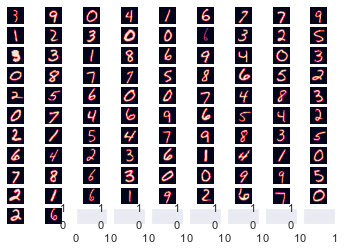

<Figure size 1440x1440 with 0 Axes>

In [19]:
fig, ax = plt.subplots(11,9)
plt.figure(figsize=(20,20))
i=0
j=0
counter = 0
while(j < 11):
    if counter == len(images)-1:
        break
    while(i < 9):
        ax[j,i].imshow(images[counter])
        ax[j,i].axis('off')
        if counter == len(images)-1:
            break
        counter = counter + 1
        i=i+1
    if i == 9:
        j=j+1
        i=0
fig.savefig('numbers.png') 

In [43]:
#Input numbers shown above into this array
y_representative_digits = np.array([3,9,0,4,1,6,7,7,9,1,2,3,0,0,6,3,2,5,3,3,1,8,6,9,4,0,3,0,8,7,7,5,8,6,5,2,2,5,6,0,0,7,4,8,3,0,7,4,6,9,6,5,4,2,2,1,5,4,7,9,8,3,5,6,4,2,3,6,1,4,1,0,7,8,6,3,0,0,9,9,5,2,1,6,1,9,2,6,7,0,2,6])

In [38]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ ==i] = y_representative_digits[i]

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test,y_test)

0.8073809523809524

# End of semi-supervised learned method
Our semi-supervised kmeans logistical regression classification resulted in a .81 score. This underperformed compared to out of the box logistic regression. 92 was the GridSearchCV resulting best parameter.

# Adding Label Propagation

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8433333333333334

We get a better result with Label propagation.

Going to try and propagate the labels to the 20% of the instances that are closest to the centroids to see if we can improve our score

In [49]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [50]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.7953571428571429

Well that didn't help. Lets try GridSearchCV. Note only run this once. It takes 2+ hours to run.

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=92)),
    ('log_reg', LogisticRegression()),
])
pipeline.fit(X_train, y_train)

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

........... kmeans__n_clusters=53, total=  51.0s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=  48.3s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=  47.5s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=  52.5s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=  50.1s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=  50.6s
[CV] kmeans__n_clusters=55 ...........................................
[CV] ............................ kmeans__n_clusters=55, total=  52.5s
[CV] kmeans__n_clusters=55 ...........................................
[CV] .......................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=92)),
    ('log_reg', LogisticRegression()),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=92)),
                ('log_reg', LogisticRegression())])

In [52]:
pipeline.score(X_test, y_test)

0.8729761904761905

In [167]:
grid_clf.best_params_

{'kmeans__n_clusters': 92}

In [170]:
grid_clf.score(X_test, y_test)

0.866547619047619

In [59]:
pipeline_prediction = pipeline.predict(test_data)

RangeIndex(start=0, stop=28000, step=1)

In [67]:
pipeline_prediction_df = pd.DataFrame(pipeline_prediction, columns=['ImageId','Label'])
pipeline_prediction_df.index = np.arange(1, len(pipeline_prediction_df) + 1)

ValueError: Shape of passed values is (28000, 1), indices imply (28000, 2)

In [66]:
pipeline_prediction_df.to_csv('Predictions\pipeline_prediction.csv')